In [426]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [427]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer



In [428]:
#Loading the Datasets


# df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

# df_rating_raw.info()


In [429]:
# df_rating_raw.sample(10)

In [430]:

# df_data_raw = pd.read_csv('../data/raw/books_data.csv')

# df_data_raw.info()

In [431]:
# df_data_raw.sample(10)

In [432]:
#Revisar Valores Nulos
# df_rating_raw.isna().sum()

In [433]:
# df_data_raw.isna().sum()

In [434]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are nan. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/helpfulness: Unncesary column for current analysis
#   - review/summary: Unncesary column for current analysis
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/helpfulness'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [435]:
df_rating_processed.sample(10)

,Title,User_id,review/score,review/time,review/summary,review/text
615347,Riddle-Master,A2PEK8A2UHAY5K,2.0,1088121600,approach with caution,"The hero whines a lot, suffers inexplicably ov..."
866730,"The Black Canary Archives, Vol. 1 (DC Archive ...",A1RHM4JTUYXKSG,5.0,1230508800,Imagine Robert Mitchum in fishnet stockings an...,"No wait, don't do that. Do the opposite of tha..."
828257,Wuthering Heights,A3MNV2UOUTCY5H,5.0,1323648000,A Most Perfect Novel from an Author's Perspective,(Spoiler)Wuthering Heights is one of the most ...
549356,The Absent Author (A to Z Mysteries),NaN,5.0,1039392000,The best mystery,I gave this book five stars because it was a m...
2973423,The Count of Monte Cristo,ACZ2CLZ2WNBBD,4.0,1026864000,A man with a plan finds some jewels in a Pan,You are not getting the full story with this e...
352487,Victoria and the Rogue,NaN,5.0,1056672000,A must read!,This book is perhaps one of the best in the Av...
785441,Bridge to Terabithia,NaN,5.0,947462400,A book with a message,I can honestly say that this is the best book ...
2962519,Chinese calligraphy;: An introduction to its a...,AICL80OAL3492,5.0,1286409600,A Timeless Teaching Book on Kanji or Chinese C...,As a Chinese brush painting teacher I would re...
1975074,Phantom,A2539BWD9JDYDV,2.0,1142294400,"""Special Kay's"" Novel Not-So-Special",If you're in the mood for decent Phantom fanfi...
2246995,Three Nights...,A3NHO65CI8XSU8,5.0,1122422400,Terrific!,This was a great book. I read it in 2 days. Th...


In [436]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/summary': 'summary',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [437]:
df_rating_processed.isna().sum()

title             208
user_id        561787
review              0
review_time         0
summary           407
text                8
dtype: int64

In [438]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [439]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [440]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    # try:    
        
        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the integer mean from 0 to 9 is used: 5
        date = date.replace('?', '5')

        date = parse(date)
        
        return date.strftime("%Y")
    # except:        
    #     return None

In [441]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [442]:
df_data_processed.sample(5)

,title,authors,publisher,categories,published_year
41927,Breaking Out of Beginner's Spanish,['Joseph J. Keenan'],University of Texas Press,['Foreign Language Study'],2010
128598,Coyote Frontier,['Allen Steele'],Penguin,['Fiction'],2005
57331,One More Bunny Board Book,['Rick Walton'],HarperCollins,['Addition'],2000
68454,"Four Year Colleges 2002, Guide to (Peterson's ...",NaN,NaN,NaN,2002
101760,The Edges of the Field: Lessons on the Obligat...,['Joseph William Singer'],Beacon Press,['Law'],2001


In [443]:
df_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188353 entries, 0 to 212403
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   title           188353 non-null  object
 1   authors         180990 non-null  object
 2   publisher       136518 non-null  object
 3   categories      171205 non-null  object
 4   published_year  187098 non-null  object
dtypes: object(5)
memory usage: 8.6+ MB


In [444]:
#Updating the Authors to a list.
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: [author for author in str(x).split(",")] if pd.notna(x) else None)

In [483]:
#Updating Categories to list
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: [category for category in str(x).split(",")] if pd.notna(x) else None)

In [502]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [43]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='Title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Title           object 
 1   User_id         object 
 2   review/score    float64
 3   review/time     int64  
 4   review/summary  object 
 5   review/text     object 
 6   authors         object 
 7   publisher       object 
 8   publishedDate   object 
 9   categories      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 228.9+ MB


In [46]:
df_all_data_processed.sample(5)

,Title,User_id,review/score,review/time,review/summary,review/text,authors,publisher,publishedDate,categories
1814250,The Heart and Soul of Nick Carter,NaN,5.0,924825600,"A big fan from Philippines, April 23, 1999",The book about Nick is really great! It shows ...,['Jane Carter'],Onyx Books,1998,['Performing Arts']
1522913,"Relics (Faye Longchamp Mysteries, No. 2)",A38YY9BEVDT1DB,5.0,1358985600,Archaeology plus murder mystery equals a good ...,Loved the way buried history and a murder myst...,['Mary Anna Evans'],"Sourcebooks, Inc.",2011-09-30,['Fiction']
2968716,Hood Rich,A1SS3E0IU5QB59,3.0,1188086400,Hood Rich...It was JUST O.K.,I was expecting it to be better than what it r...,['Corie Allen'],Createspace Independent Publishing Platform,2016-01-13,NaN
1541809,Cities For A Small Planet (Icon Editions),A3RUL3MC73721,5.0,1148428800,...But I like my life in the suburbs,"""Cities for a Small Planet give me the reassur...",NaN,NaN,NaN,NaN
1093556,The Middle Length Discourses of the Buddha: A ...,A3IT9M2R4S2ZQ,5.0,1330646400,Get the context and the subtleties,"- Both translators are Buddhist practitioners,...",NaN,Simon and Schuster,2005-06-10,['Religion']


In [47]:
df_all_data_processed.isna().sum()

Title                208
User_id           561787
review/score           0
review/time            0
review/summary       407
review/text            8
authors           390634
publisher         782617
publishedDate     354581
categories        551498
dtype: int64

In [49]:
df_all_data_processed[df_all_data_processed['Title']=='The Hobbit']

,Title,User_id,review/score,review/time,review/summary,review/text,authors,publisher,publishedDate,categories
563175,The Hobbit,NaN,5.0,1029715200,jrr tolkien`s the hobbit,this is a great book. i say *is* because i hav...,['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']
563176,The Hobbit,A3E9WR9GH1HFT0,5.0,1012348800,Wonderful!! Tolkien is a God!,I love this book. I am 13 &amp; I read all the...,['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']
563177,The Hobbit,A13DFLTGGGJLWN,4.0,1200787200,"Good, but I'd rather just have the story",I physically looked this book over in a store ...,['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']
563178,The Hobbit,AV4Y360SJ4PHP,1.0,1355875200,The Hobbit on Kindle...thou shall not pass the...,"I downloaded my favorite book, the Hobbit to m...",['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']
563179,The Hobbit,A2M7RJZQPYN4PI,3.0,1200355200,Not the Best Annotated Book I Ever Read,Minuses:1. Too many margin comments on the rev...,['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']
...,...,...,...,...,...,...,...,...,...,...
585193,The Hobbit,AGMSR3RGOCYEI,5.0,1360195200,"Great story, much better than the movie",I was inspired to reread Tolkien's &#34;the Ho...,['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']
585194,The Hobbit,A2APZUY5HK7CDT,5.0,1360195200,Amazing,This novel is action packed full of fun and ad...,['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']
585195,The Hobbit,A3CX6FLUJFOAZZ,5.0,1360195200,Amazing,T h I s I s a m a z I n g a n d g r e a t and ...,['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']
585196,The Hobbit,A12I6YHESO0KFB,5.0,1360195200,Hobbit,"Still holds up after all these years,a true cl...",['J. R. R. Tolkien'],Mariner Books,2012,['Juvenile Fiction']


In [ ]:
#EDA

In [15]:
df_rating_processed.shape

(3000000, 7)

In [16]:
df_data_processed.shape

(212404, 6)

In [33]:
df_rating_processed['review/score'].value_counts()

review/score
5.0    1807343
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: count, dtype: int64

In [42]:
df_rating_processed['review/score'].describe()

count    3.000000e+06
mean     4.215289e+00
std      1.203054e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: review/score, dtype: float64

<Axes: >

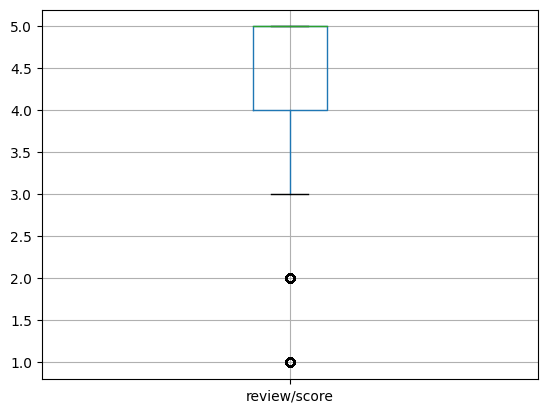

In [43]:
df_rating_processed.boxplot(column=['review/score'])

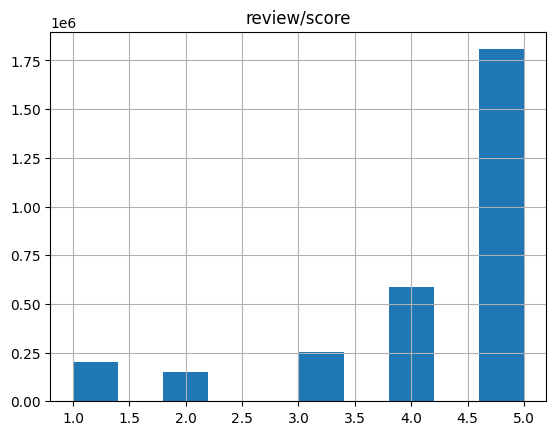

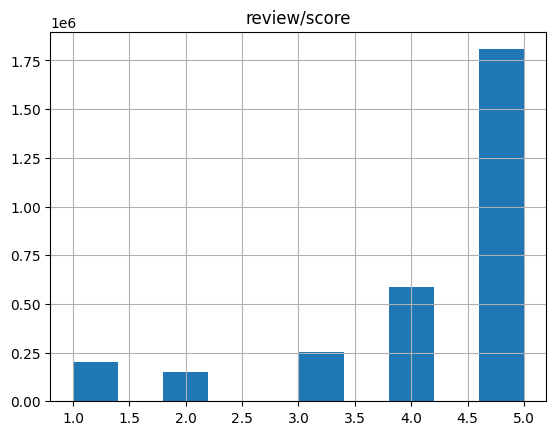

In [45]:
df_rating_processed.hist(column=['review/score'])
plt.show()

In [46]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].mean()

4.657131181038006

In [47]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].describe()

count    22023.000000
mean         4.657131
std          0.800452
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64

In [48]:

df_rating_processed[df_rating_processed['Title']== 'Atlas Shrugged']['review/score'].describe()

count    12513.000000
mean         4.028690
std          1.418635
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64